## Import Library Penting

In [61]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras

## Konfigurasi Matplotlib

In [63]:
plt.style.use('default')
plt.rcParams.update({"grid.linestyle": "--", "grid.alpha": 0.5})

## Generate Data Sintetik Non-Linear (N=200)

In [64]:
def generate_data(Ndata=200, noise_ampl=1.5, random_seed=1234):
    np.random.seed(random_seed)
    x = np.linspace(-10.0, 10.0, Ndata)
    y = 0.5*x**2 + 3*x - 0.4 + noise_ampl*np.random.randn(Ndata) + 5.0*np.sin(x)
    return x, y

Ndata = 200
x_orig, y_orig = generate_data(Ndata=Ndata, noise_ampl=2.0, random_seed=42)

## Preprocessing (Gunakan PolynomialFeatures) dan Split Data

In [65]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X = poly.fit_transform(x_orig[:,np.newaxis])
y = y_orig[:,np.newaxis] # Target shape (Ndata, 1)

In [66]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"Data shapes: Train X={x_train.shape}, y={y_train.shape} | Test X={x_test.shape}, y={y_test.shape}")

Data shapes: Train X=(140, 2), y=(140, 1) | Test X=(60, 2), y=(60, 1)


## Build, Latih, dan Evaluasi Model Neural Network

Di sini, saya akan membuat 2 model neural network yang berbeda
- Model 1: 1 Hidden Layer, 10 node, Tanh
- Model 2: 1 Hidden Layer, 16 node, ReLU

### Buat Fungsi Callback

In [67]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, restore_best_weights=True)

### Model 1

In [68]:
tf.random.set_seed(42)
model_1 = keras.Sequential([
    keras.layers.InputLayer(shape=[x_train.shape[1],]), # Input shape = 2
    keras.layers.Dense(10, activation="tanh"),
    keras.layers.Dense(units=1, activation="linear")
], name="Model_1_10Tanh")
model_1.compile(optimizer="rmsprop", loss="mse")

model_1.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test),
            callbacks=[early_stopping], verbose=0)

y_pred_test_1 = model_1.predict(x_test)
rmse_1 = np.sqrt(mean_squared_error(y_test, y_pred_test_1))
print(f"Model 1 Test RMSE: {rmse_1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 1 Test RMSE: 4.6229


### Model 2

In [69]:
tf.random.set_seed(42)
model_2 = keras.Sequential([
    keras.layers.InputLayer(shape=[x_train.shape[1],]), # Input shape = 2
    keras.layers.Dense(16, activation="relu"), # Aktivasi ReLU, 16 nodes
    keras.layers.Dense(units=1, activation="linear")
], name="Model_2_16ReLU")
model_2.compile(optimizer="adam", loss="mse") # Adam optimizer

model_2.fit(x_train, y_train, epochs=1000, validation_data=(x_test, y_test),
            callbacks=[early_stopping], verbose=0)

y_pred_test_2 = model_2.predict(x_test)
rmse_2 = np.sqrt(mean_squared_error(y_test, y_pred_test_2))
print(f"Model 2 Test RMSE: {rmse_2:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Model 2 Test RMSE: 23.7711


## Tentukan Model Terbaik

### Cek Nilai RMSE

In [70]:
if rmse_1 < rmse_2:
    best_model_name = model_1.name
    best_rmse = rmse_1
    best_model = model_1
    print(f"Model terbaik: {best_model_name} (RMSE={best_rmse:.4f})")
else:
    best_model_name = model_2.name
    best_rmse = rmse_2
    best_model = model_2
    print(f"Model terbaik: {best_model_name} (RMSE={best_rmse:.4f})")

Model terbaik: Model_1_10Tanh (RMSE=4.6229)


Prediksi Data Asli (X) Dengan Model Terbaik

In [71]:
y_pred_all = best_model.predict(X)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


### Visualisasi

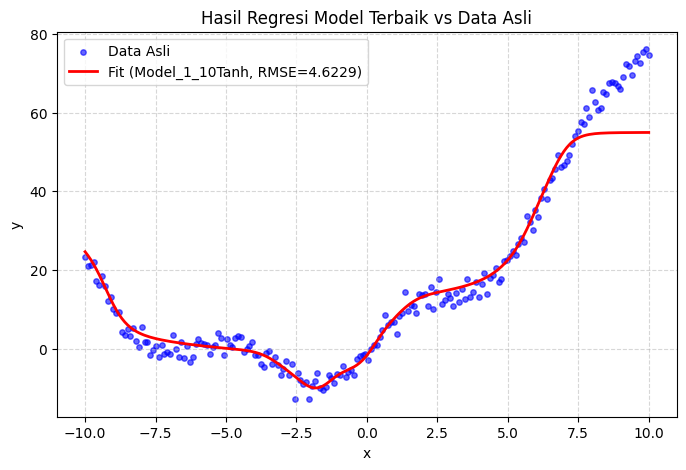

In [72]:
plt.figure(figsize=(8, 5))
plt.scatter(x_orig, y_orig, label="Data Asli", s=15, alpha=0.6, c='blue')

# Urutkan berdasarkan x asli untuk plot garis yang mulus
sort_idx = np.argsort(x_orig)

plt.plot(x_orig[sort_idx], y_pred_all[sort_idx], color='red', linewidth=2,
         label=f'Fit ({best_model_name}, RMSE={best_rmse:.4f})')
plt.title('Hasil Regresi Model Terbaik vs Data Asli')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()